In [2]:
import os
import pickle
import matplotlib.pyplot as plt                     
import numpy as np                                    
import pandas as pd
from pathlib import Path
from textwrap import wrap
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Random forest and boosting packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)

C:\
C:\/data


In [5]:
household_poverty = pd.read_csv('https://raw.githubusercontent.com/Skillsoft-Content/Advanced-Classification-with-Python/main/data/costa_rica_poverty.csv')
print(household_poverty.head())

  household_id        ind_id  rooms  tablet  males_under_12  males_over_12  \
0    21eb7fcc1  ID_279628684      3       0               0              1   
1    0e5d7a658  ID_f29eb3ddd      4       1               0              1   
2    2c7317ea8  ID_68de51c94      8       0               0              0   
3    2b58d945f  ID_d671db89c      5       1               0              2   
4    2b58d945f  ID_d56d6f5f5      5       1               0              2   

   males_tot  females_under_12  females_over_12  females_tot  ...  \
0          1                 0                0            0  ...   
1          1                 0                0            0  ...   
2          0                 0                1            1  ...   
3          2                 1                1            2  ...   
4          2                 1                1            2  ...   

   region_Chorotega  region_pacifico  region_brunca  region_antlantica  \
0                 0                0      

In [6]:
#### Slide 37: Converting the target variable  ####

household_poverty['Target'] = np.where(household_poverty['Target'] <= 3, 'vulnerable','non_vulnerable')
print(household_poverty['Target'].head())

0    non_vulnerable
1    non_vulnerable
2    non_vulnerable
3    non_vulnerable
4    non_vulnerable
Name: Target, dtype: object


In [7]:
#### Slide 38: Data prep: target  ####

print(household_poverty.Target.dtypes)
household_poverty["Target"] = np.where(household_poverty["Target"] == "non_vulnerable", True, False)
# Check class again.
print(household_poverty.Target.dtypes)

object
bool


In [ ]:
#### Slide 39: Data prep: check NAs  ####

household_poverty.isnull().sum()

In [10]:
#### Slide 40: Subsetting the dataset  ####

costa_tree = household_poverty.drop(['household_id', 'ind_id', 'monthly_rent'], axis = 1)
print(costa_tree.head())


   rooms  tablet  males_under_12  males_over_12  males_tot  females_under_12  \
0      3       0               0              1          1                 0   
1      4       1               0              1          1                 0   
2      8       0               0              0          0                 0   
3      5       1               0              2          2                 1   
4      5       1               0              2          2                 1   

   females_over_12  females_tot  ppl_under_12  ppl_over_12  ...  \
0                0            0             0            1  ...   
1                0            0             0            1  ...   
2                1            1             0            1  ...   
3                1            2             1            3  ...   
4                1            2             1            3  ...   

   region_central  region_Chorotega  region_pacifico  region_brunca  \
0               1                 0          

In [25]:
#### Slide 42: Pickle the dataset  ####

pickle.dump(costa_tree, open("costa_clean.sav", "wb" ))

<Axes: >

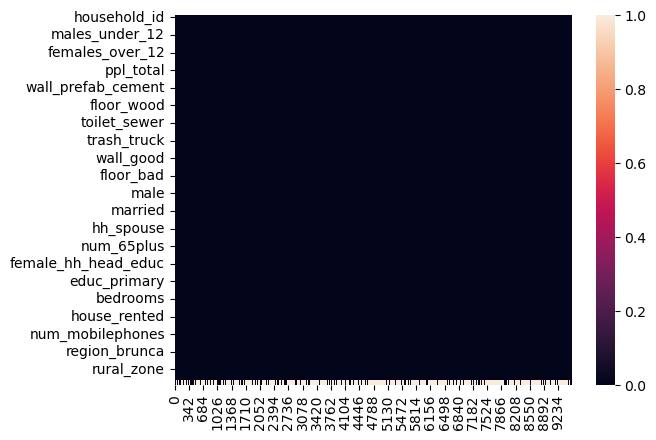

In [9]:
import seaborn as sns
sns.heatmap(household_poverty.isnull().transpose())

### showing 0 missing variables in heatmap - therefore all black (not blank)

<Axes: >

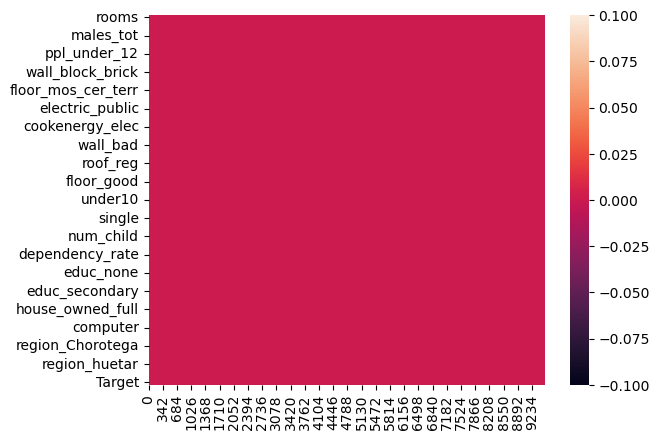

In [12]:
#### Slide 46: Split into training and test sets  ####

# Select the predictors and target.
X = costa_tree.drop(['Target'], axis = 1)
y = np.array(costa_tree['Target'])

# Set the seed to 1.
np.random.seed(1)

# Split into the training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [15]:
X_train.shape

(6689, 80)

In [16]:
costa_tree.shape

(9557, 81)

In [17]:
X_test.shape

(2868, 80)

In [18]:
#### Slide 48: Building our model  ####

forest = RandomForestClassifier(criterion = 'gini', 
                                n_estimators = 100, 
                                random_state = 1)

In [19]:

#=================================================-
#### Slide 49: Fitting our model  ####

# Fit the saved model to your training data.
forest.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [20]:

#=================================================-
#### Slide 50: Predicting with our data  ####

# Predict on test data.
y_predict_forest = forest.predict(X_test)

# Look at the first few predictions.
print(y_predict_forest[0:5,])


[ True  True  True  True  True]


In [21]:
### the mean of a binary is the true proportion 

(y_predict_forest == y_test).mean()

0.943863319386332

In [24]:
X_test['predictions'] = y_predict_forest
X_test['actuals'] = y_test
X_test
    


,rooms,tablet,males_under_12,males_over_12,males_tot,females_under_12,females_over_12,females_tot,ppl_under_12,ppl_over_12,...,region_Chorotega,region_pacifico,region_brunca,region_antlantica,region_huetar,urban_zone,rural_zone,age,predictions,actuals
4673,6,0,0,2,2,0,1,1,0,3,...,0,0,0,0,0,1,0,51,True,True
3920,5,0,2,1,3,1,3,4,3,4,...,0,0,0,0,0,1,0,6,True,True
7442,9,1,0,0,0,1,1,2,1,1,...,0,0,1,0,0,0,1,29,True,True
7746,3,0,1,1,2,1,1,2,2,2,...,0,0,1,0,0,0,1,8,True,True
218,5,1,0,2,2,0,1,1,0,3,...,0,0,0,0,0,1,0,61,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8654,4,0,0,2,2,0,0,0,0,2,...,0,0,0,1,0,0,1,54,True,True
4482,7,0,0,3,3,0,3,3,0,6,...,0,0,0,0,0,1,0,55,True,True
6118,4,1,0,2,2,1,1,2,1,3,...,1,0,0,0,0,1,0,35,True,True
8566,2,0,1,1,2,1,1,2,2,2,...,0,0,0,1,0,0,1,3,True,True
